# Homework 3 - Xiao Bao Bao

In [1]:
# Author - Xiao Bao Bao 
# ECS 171 Intro to Machine Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import mpl_toolkits

from math import sqrt

## Preprocessing

In [2]:
df = pd.read_csv('bitstrings.csv')
df.head()

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   b15     1200 non-null   int64
 1   b14     1200 non-null   int64
 2   b13     1200 non-null   int64
 3   b12     1200 non-null   int64
 4   b11     1200 non-null   int64
 5   b10     1200 non-null   int64
 6   b9      1200 non-null   int64
 7   b8      1200 non-null   int64
 8   b7      1200 non-null   int64
 9   b6      1200 non-null   int64
 10  b5      1200 non-null   int64
 11  b4      1200 non-null   int64
 12  b3      1200 non-null   int64
 13  b2      1200 non-null   int64
 14  b1      1200 non-null   int64
 15  b0      1200 non-null   int64
dtypes: int64(16)
memory usage: 150.1 KB


In [4]:
df.shape

(1200, 16)

In [5]:
#easier readability
X = df[::].to_numpy()

## Agglomerative Clustering

### Exercise 1.1 - Choosing Parameters

Which linkage rule to use?
Which distance function to use?
What threshold distance to use?

For our application of Agglomerative Clustering on the dataset, we decided to use single linkage rules for hierarchical clustering. This is because each of the points of data are characteristically within a set or sequence of bits through minimum bit equivalence. In other words, bits may be thought of as being equivalent when a single bit flip difference creates a sequence of bitstrings that belong to that set of bitstrings. Therefore, clustering each class by the minimum distance to the next member was the most intuitive motivation. Since the values being parsed are simply ones and zeroes representing discrete values, we decided to pursue manhattan distance metrics since the data was not a continuously normalized distribution. Finally, we know that since the bitstrings and features are again comprised of ones and zeroes, the minimum distance for clustering would need to be one, so any value slightly higher than that value was suitable for the hierarchical clustering problem.


### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

7     296
5     194
0     193
2     187
6     100
1     100
3      99
4       3
8       3
12      2
10      2
29      1
21      1
28      1
27      1
26      1
30      1
25      1
24      1
23      1
22      1
16      1
20      1
19      1
18      1
17      1
15      1
14      1
13      1
11      1
9       1
31      1
Name: class, dtype: int64
32


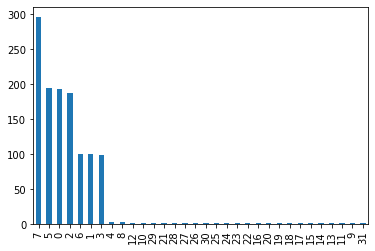

In [6]:
from sklearn.cluster import AgglomerativeClustering

agglo_clustering = AgglomerativeClustering(n_clusters=None, linkage="single", 
                                           affinity='manhattan', distance_threshold=1.2)
agglo_clustering = agglo_clustering.fit(X)

agglo_clustering_df = pd.Series(agglo_clustering.labels_, name='class')
agglo_distribution = agglo_clustering_df.value_counts()

#agglo_distribution = agglo_distribution.nlargest(32, 'first')
agglo_distribution
#agglo_results.labels_.shape
#agglo_clustering=agglo_clustering.astype({"class":'float64'})
#agglo_clustering
_ = agglo_distribution.plot(kind='bar')
print(agglo_distribution)
print(len(agglo_distribution))

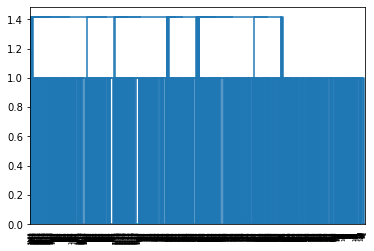

In [7]:
import scipy
from scipy.cluster import hierarchy
#Basic Cluster Sample Test
clusters = hierarchy.linkage(X, method="single")

clusters[:15]
plt.figure()
dn = hierarchy.dendrogram(clusters, orientation='top')
plt.show()

In [8]:
clusters.shape

(1199, 4)

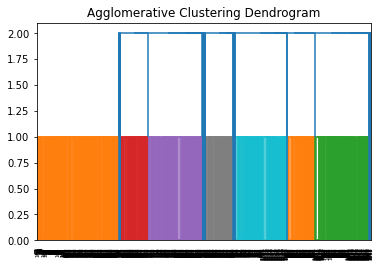

In [9]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(cluster, **kwargs):

    # Children of hierarchical clustering
    # Distances between each pair of children
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(cluster.children_.shape[0])
    n_samples = len(cluster.labels_)
    for i, merge in enumerate(cluster.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([cluster.children_, cluster.distances_,
                                      counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.title('Agglomerative Clustering Dendrogram')
plot_dendrogram(agglo_clustering)
plt.show()

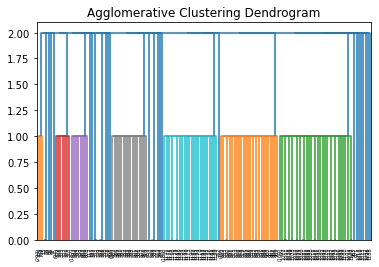

In [10]:
plt.title('Agglomerative Clustering Dendrogram')
plot_dendrogram(agglo_clustering, truncate_mode='level', p=32)
plt.show()

## K-Means Clustering

### Exercise 2.1 - K-Means Clustering for Equivalence Classes

In [11]:
from sklearn.cluster import KMeans

#initialize cluster size
k = 32
kmeans = KMeans(n_clusters=k)

kmeans.fit(X)
#kmeans_labels = est.labels_

print(kmeans.labels_)

[ 6  6  6 ... 26 26 26]


9     100
2      97
6      83
10     83
12     76
11     73
14     69
3      60
8      58
4      56
26     51
5      48
13     28
7      27
28     24
20     22
16     20
18     19
19     18
1      17
27     17
24     17
17     16
30     16
23     16
25     15
0      14
31     14
22     13
21     13
29     10
15     10
Name: class, dtype: int64
32


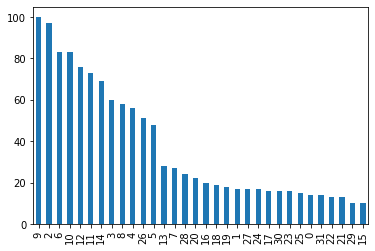

In [12]:
KMEANS_clustering = pd.Series(kmeans.labels_, name='class')
km_distribution = KMEANS_clustering.value_counts()

_ = km_distribution.plot(kind='bar')
print(km_distribution)
print(len(km_distribution))

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering

Compare the result from Exercise 2.1 with that from Exercise 1.2

There are some interesting discrepencies in the results from the bar graphs since K-means clustering and hierarchical clustering are runtime dependent. This is to say that the thoroughput of the K-means clusters depends on a prespecified number of clusters to form while the agglomerative clusters were dynamically formed depending on our specified parameters. That said, the hierarchical clustering found more clusters than K-means up to a certain number, after which changing our distance thresholds did nothing to vary the number of emergent clusters. That said, both clustering methods support the notion that a majority of equivalent sets converge to within the first 32 or so clusters since variance falls off after so many clusters are found. It also seems that the K-means clustering develops more clusters due to larger distance metrics. This is likely due to the fact that K-means is clustering based off of the mean-valued distances between the cluster centroids versus the single-distance value problem in our hierarchical model.

## Exercise 3 - Principal Component Analysis

### Exercise 3.1 - Generate 2 Clusters

In [13]:
#Initialize cluster size
k = 2
kmeans2 = KMeans(n_clusters=k)

kmeans2.fit(X)
print(kmeans2.labels_)

[1 1 1 ... 1 1 0]


1    784
0    416
Name: class, dtype: int64


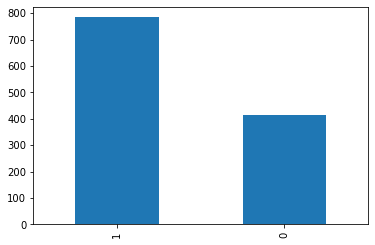

In [14]:
KMEANS_clustering = pd.Series(kmeans2.labels_, name='class')
km_distribution = KMEANS_clustering.value_counts()

_ = km_distribution.plot(kind='bar')
print(km_distribution)

### Exercise 3.2 - PCA for Feature Extraction

In [15]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#import plotly.express as px

#scale the data?
standardScaler = preprocessing.StandardScaler()
pca_clustering = PCA(n_components=2)

X = standardScaler.fit_transform(X)
pca_clusters = pca_clustering.fit(X)

#Obtain projected points along axis
X_pca = pca_clustering.transform(X)
#get PCA components
PC1, PC2 = pca_clustering.components_
pca_df_weights = pd.DataFrame(pca_clustering.components_)
#get variance in components from eigenvalues
PC1_var, PC2_var = pca_clustering.explained_variance_ratio_

pca_df_weights

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.308888,-0.292539,-0.135621,0.010928,-0.005877,-0.237307,-0.405267,-0.404264,0.351573,0.271502,-0.120196,-0.036119,-0.231824,-0.019784,-0.014485,0.386089
1,0.131768,0.202373,-0.161402,-0.478593,-0.275887,-0.112994,-0.020652,0.065938,-0.204401,-0.134228,-0.284107,0.445815,-0.286593,-0.212880,-0.354897,0.015954


In [16]:
#Show scatter plot

plt.figure(figsize=(7,7))

label_z = kmeans2.labels_
label_min, label_max = label_z.min(), label_z.max()

print(np.unique(label_z))

[0 1]


<Figure size 504x504 with 0 Axes>

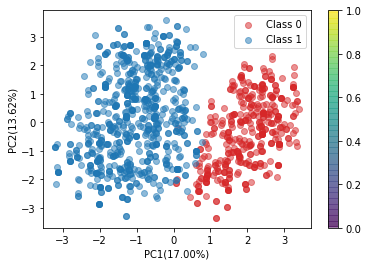

In [17]:
#Loop through every datapoint and plot variance on scatterplot

colors = ['tab:red', 'tab:blue']

for l in np.unique(label_z):
    plt.scatter(X_pca[(label_z==l), 0], X_pca[(label_z==l), 1], c=colors[l], vmin = label_min, vmax = label_max,
            #cmap=plt.get_cmap('RdBu'), 
                alpha=0.5, label=f'Class {l}')

plt.legend()
plt.xlabel("PC1({:.2%})".format(PC1_var))
plt.ylabel("PC2({:.2%})".format(PC2_var))
plt.colorbar()

plt.show()

In [18]:
pca_df_weights.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.308888,-0.292539,-0.135621,0.010928,-0.005877,-0.237307,-0.405267,-0.404264,0.351573,0.271502,-0.120196,-0.036119,-0.231824,-0.019784,-0.014485,0.386089
1,0.131768,0.202373,-0.161402,-0.478593,-0.275887,-0.112994,-0.020652,0.065938,-0.204401,-0.134228,-0.284107,0.445815,-0.286593,-0.212880,-0.354897,0.015954


In [19]:
pca_df_weights.loc[0,:]

0     0.308888
1    -0.292539
2    -0.135621
3     0.010928
4    -0.005877
5    -0.237307
6    -0.405267
7    -0.404264
8     0.351573
9     0.271502
10   -0.120196
11   -0.036119
12   -0.231824
13   -0.019784
14   -0.014485
15    0.386089
Name: 0, dtype: float64

In [20]:
print("Max weight occurs at : ", pca_df_weights.loc[0,:].max())

Max weight occurs at :  0.38608892990826604
